# 回帰木（特徴量：RM、max_depth=2）の予測値の可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install graphviz==0.20.1
# !pip install scikit-learn==1.2.2

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import mean_squared_error

In [2]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__) 

1.5.3
1.22.4
3.7.1
0.20.1
1.2.2


In [3]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [4]:
# 特徴量と目的変数の設定
X_train = df.loc[:99, ['RM']] # 特徴量に100件のRM（平均部屋数）を設定
y_train = df.loc[:99, 'MEDV'] # 正解値に100件のMEDV（住宅価格）を設定
print('X_train:', X_train[:3])
print('y_train:', y_train[:3])

X_train:       RM
0  6.575
1  6.421
2  7.185
y_train: 0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64


In [5]:
# モデルの学習
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=2, min_samples_leaf=1, ccp_alpha=0, random_state=0) # 深さ2の回帰木モデル
model.fit(X_train, y_train)
model.get_params()

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [6]:
# 予測値
model.predict(X_train)

array([23.72777778, 23.72777778, 32.47      , 32.47      , 32.47      ,
       23.72777778, 18.64423077, 23.72777778, 18.64423077, 18.64423077,
       23.72777778, 18.64423077, 18.64423077, 18.64423077, 18.64423077,
       18.64423077, 18.64423077, 18.64423077, 18.64423077, 18.64423077,
       18.64423077, 18.64423077, 18.64423077, 18.64423077, 18.64423077,
       18.64423077, 18.64423077, 18.64423077, 23.72777778, 23.72777778,
       18.64423077, 18.64423077, 18.64423077, 18.64423077, 18.64423077,
       18.64423077, 18.64423077, 18.64423077, 18.64423077, 23.72777778,
       32.47      , 23.72777778, 23.72777778, 23.72777778, 18.64423077,
       18.64423077, 18.64423077, 18.64423077, 18.64423077, 18.64423077,
       18.64423077, 18.64423077, 23.72777778, 18.64423077, 18.64423077,
       32.47      , 23.72777778, 32.47      , 23.72777778, 18.64423077,
       18.64423077, 18.64423077, 23.72777778, 23.72777778, 32.47      ,
       23.72777778, 18.64423077, 18.64423077, 18.64423077, 18.64

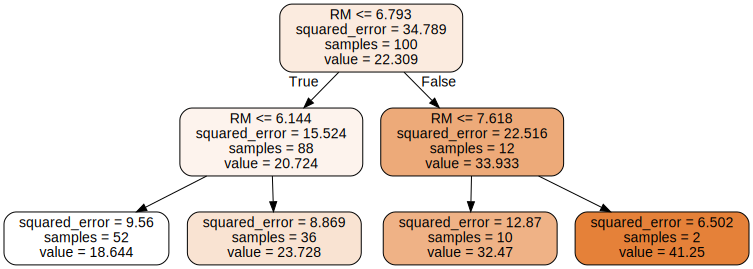

In [7]:
# 木の可視化
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, rounded=True, feature_names=['RM'], filled=True)
graphviz.Source(dot_data, format='png')

/usr/local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


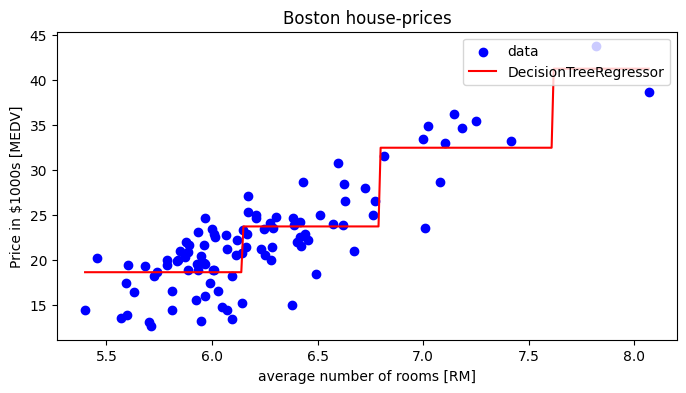

In [8]:
# データと予測値の可視化
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
X = X_train.values.flatten() # numpy配列に変換し、1次元配列に変換
y = y_train.values # numpy配列に変換

# Xの最小値から最大値まで0.01刻みのX_pltを作成し、2次元配列に変換
X_plt = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_pred = model.predict(X_plt) # 住宅価格を予測

# 学習データ(平均部屋数と住宅価格)の散布図と予測値のプロット
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_pred, color='red' ,label='DecisionTreeRegressor')
plt.ylabel('Price in $1000s [MEDV]')
plt.xlabel('average number of rooms [RM]')
plt.title('Boston house-prices')
plt.legend(loc='upper right')
plt.show()